# A simple tutorial on the usage of the storystructure module


In [1]:
%matplotlib inline
from pathlib import Path
from subprocess import call
import numpy as np
import pandas as pd
from storystructure import storystructure
from IPython.display import display, Image
import rpy2.rinterface
from ggplot import *

dataPath = Path.cwd().parent/'data'
figPath = Path.cwd().parent/'figs'


## Dolmadakia

### Visualize story graph


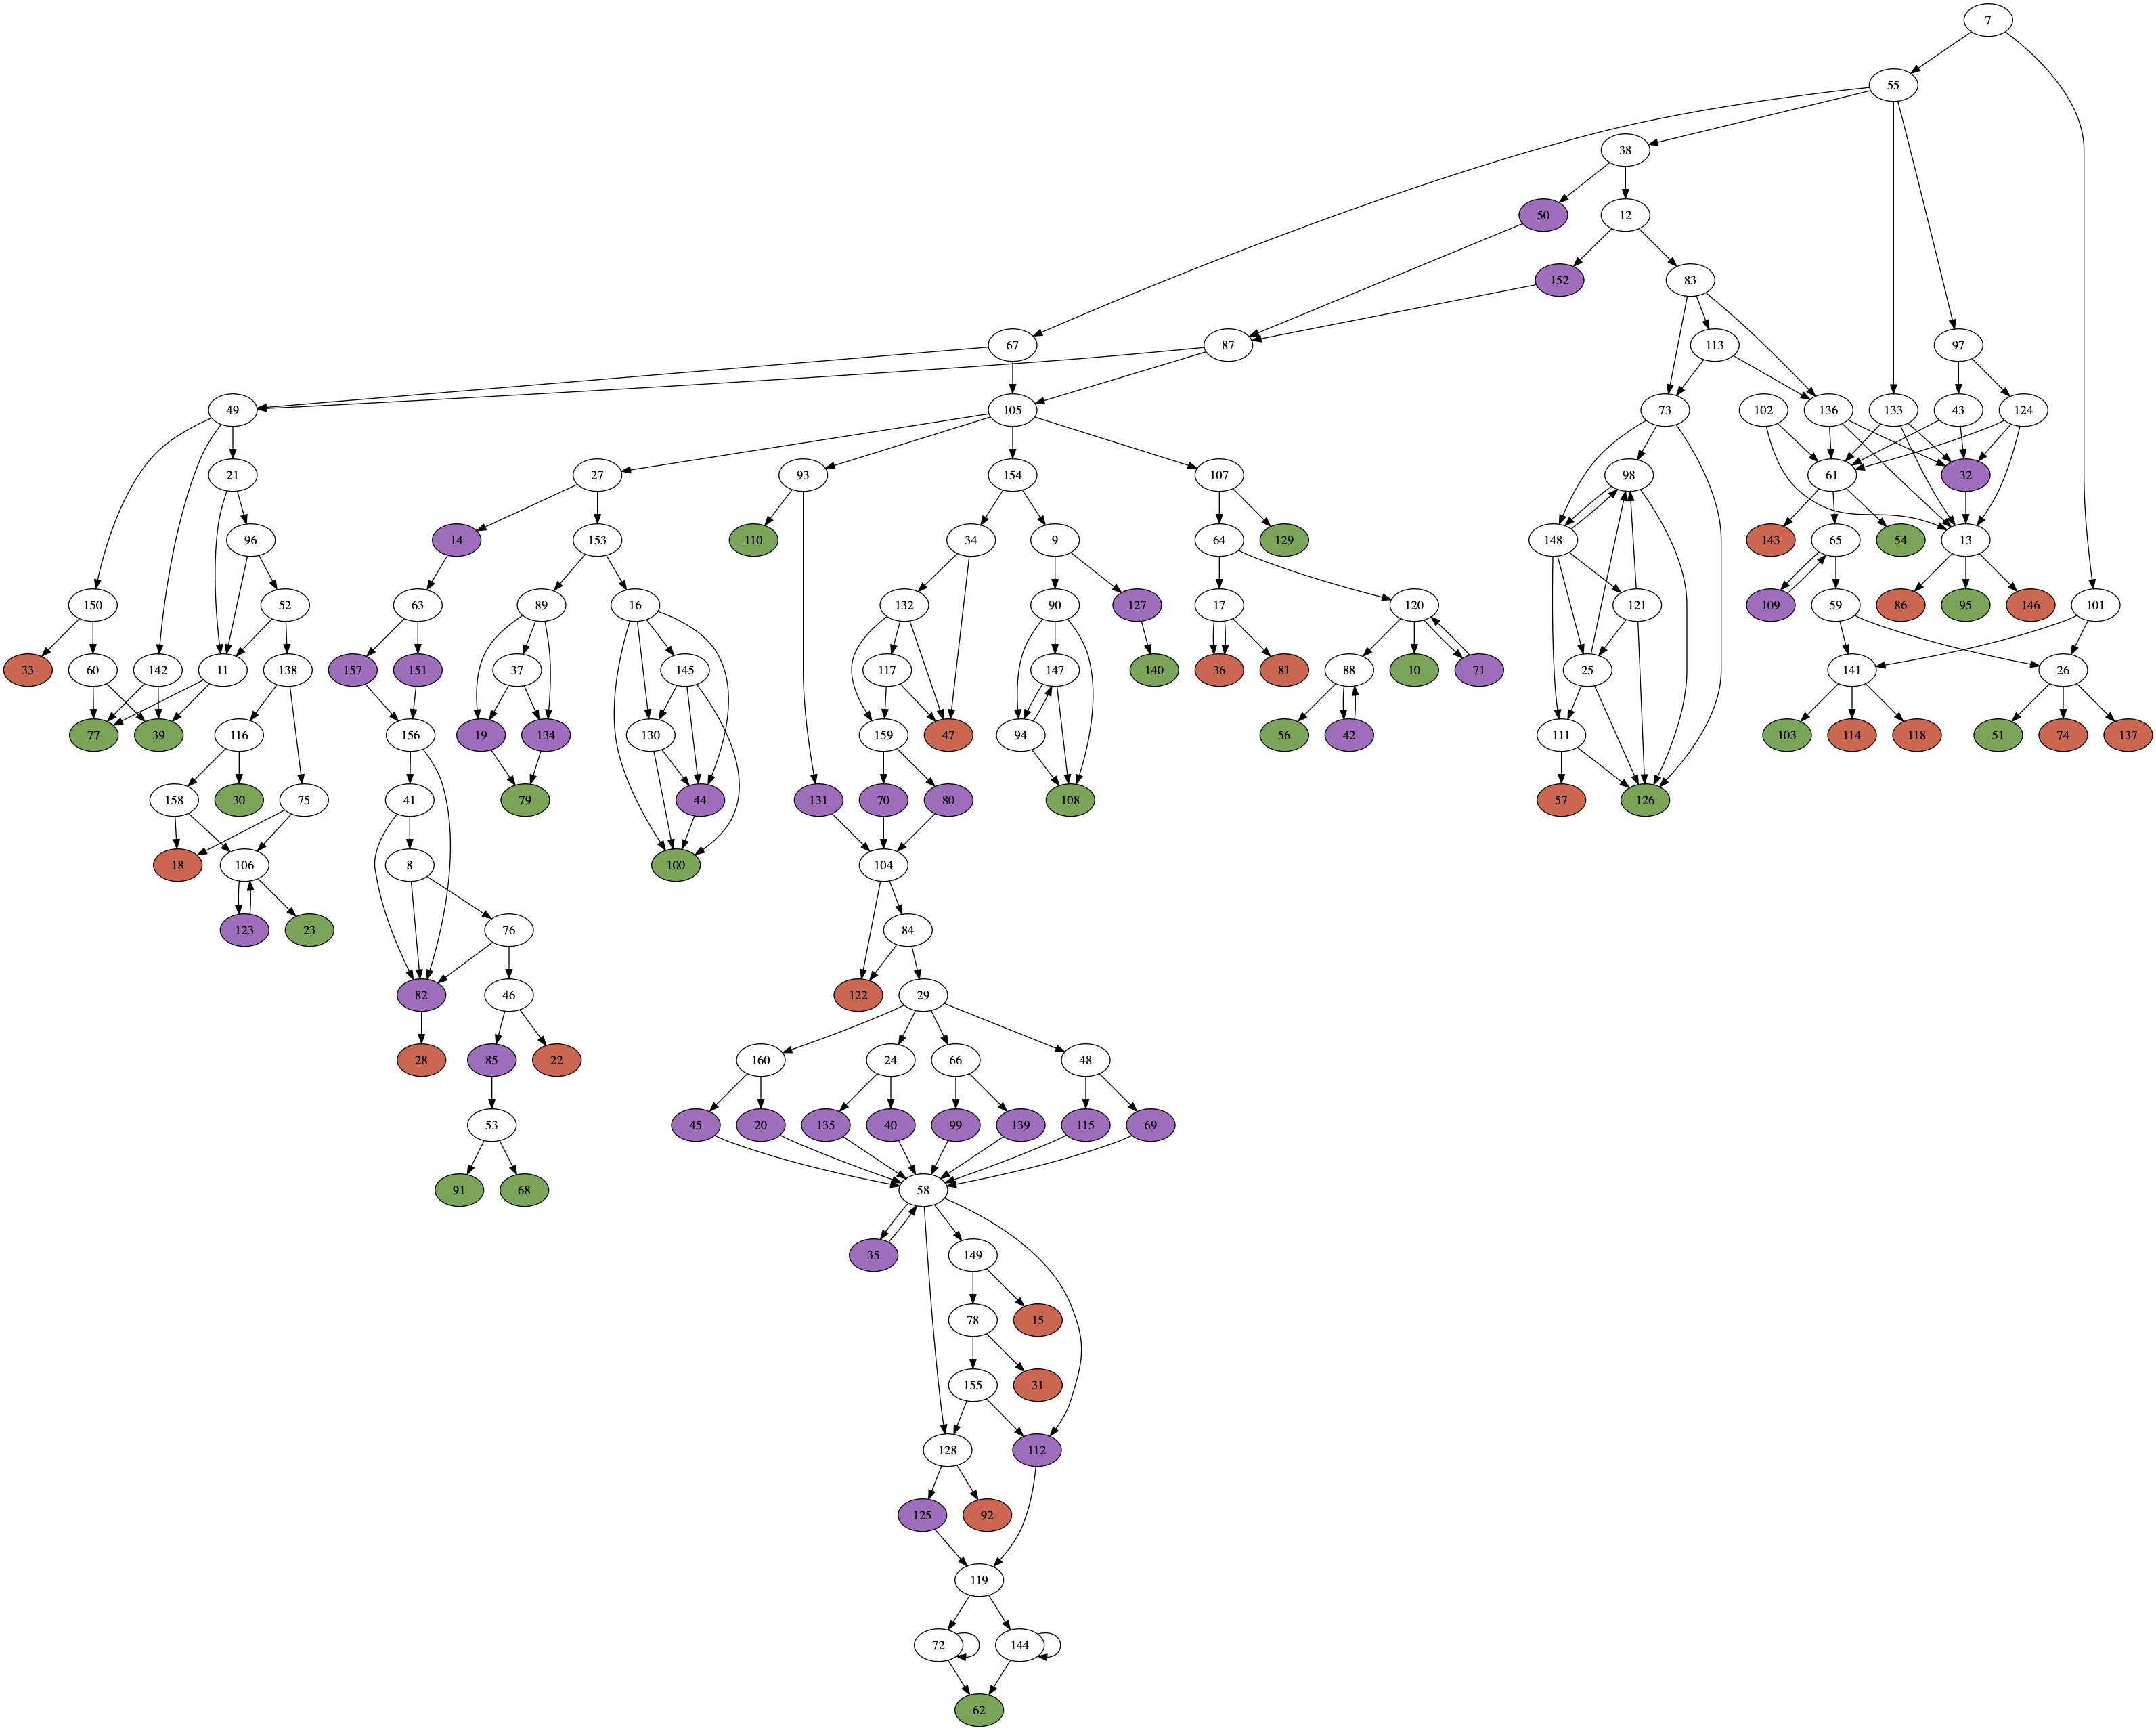

In [2]:
# create a new object
DolmadakiaStoryStructure = storystructure()
# load an edgelist and node attributes
DolmadakiaStoryStructure.loadStory(edges=dataPath/'dolmadakia'/'edgelist.csv',
            nodes=dataPath/'dolmadakia'/'nodeAttributes.csv')
# Make figure
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakia.png')
i = Image(filename=str(figPath/'dolmadakia.png'))
display(i)

### Find problems or interesting features in structure
- Removing self loops
- Removing double edges 

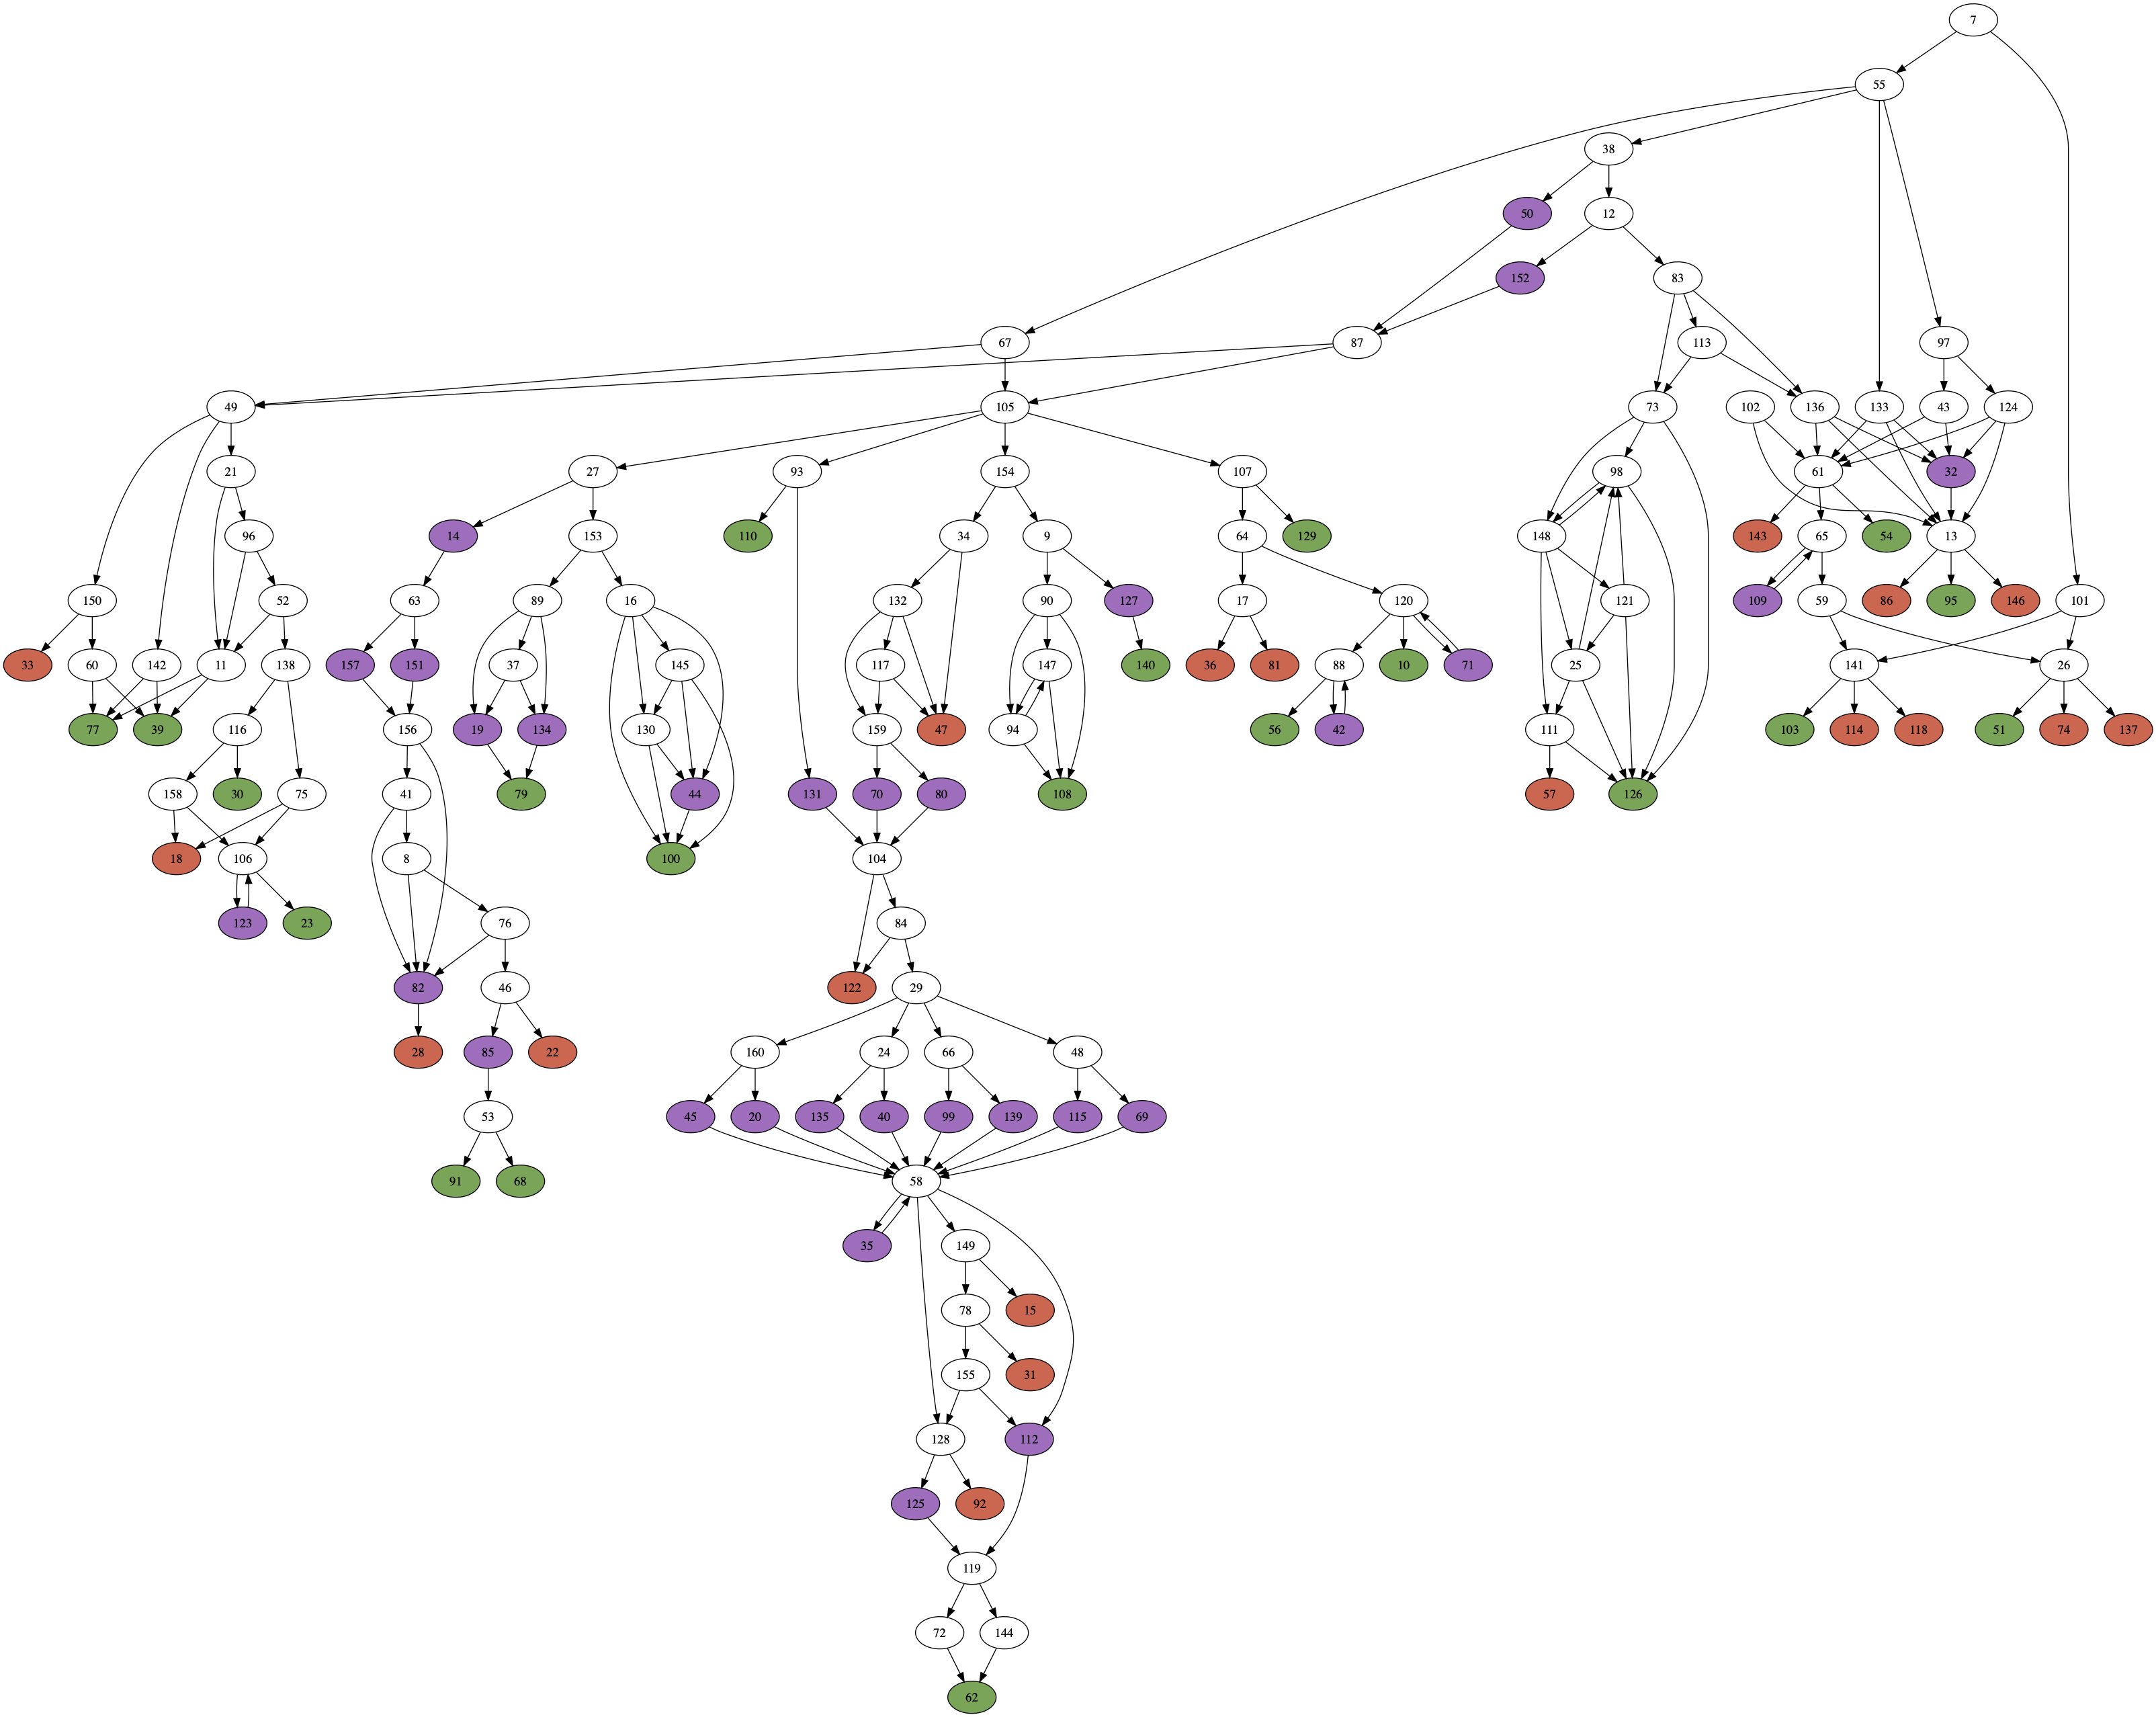

In [3]:
DolmadakiaStoryStructure.simplify()
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakia_simplified.png')
i = Image(filename=str(figPath/'dolmadakia_simplified.png'))
display(i)

## Make DAG graph
The graph has multiple starting nodes (this is an error in the source). The correct start node is page 7

In [4]:
DolmadakiaStoryStructure.makeGraph() 
[node.id for node in DolmadakiaStoryStructure.getStart()]


[7, 102]

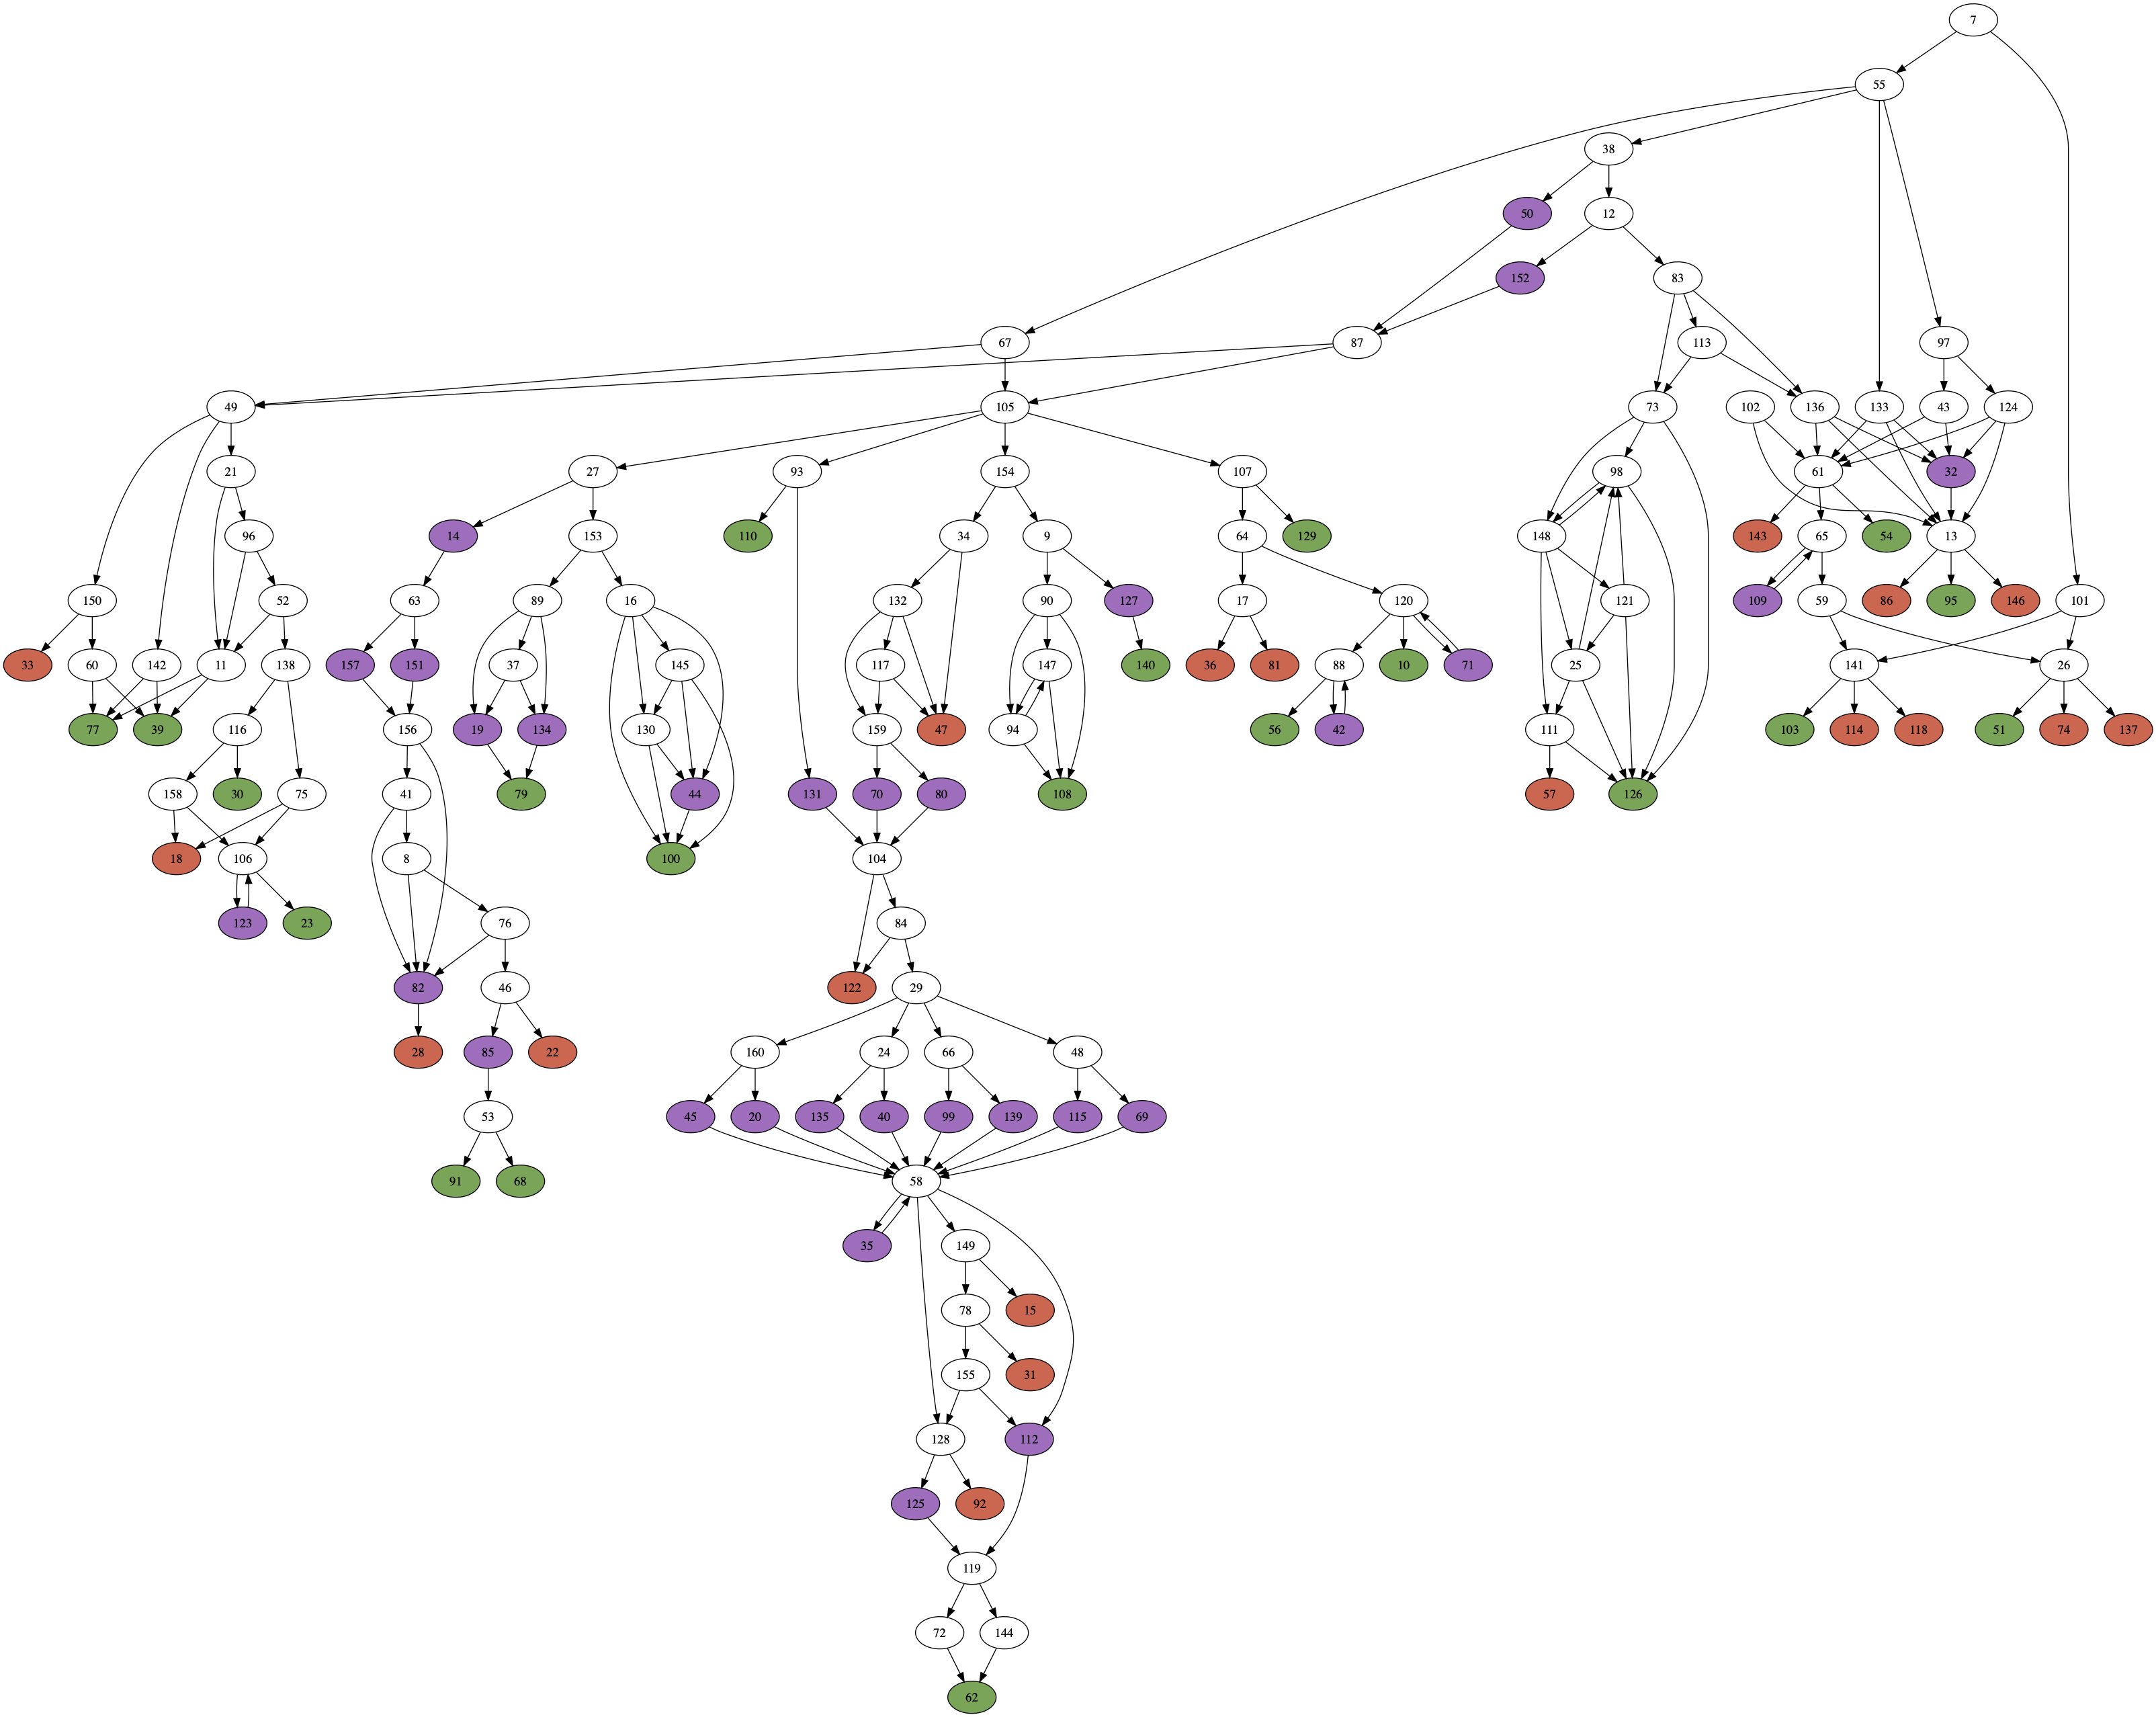

In [5]:
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakia_DAG.png')
i = Image(filename=str(figPath/'dolmadakia_DAG.png'))
display(i)

### Enumerate all possible stories

In [6]:
%%capture
# calculate path statistics starting from root at page 7
DolmadakiaStoryStructure.savePathStats(7, dataPath/'dolmadakia'/'allPaths.dat')

DolmadakiaStoryStructure.pathsToEdgelist()
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakiaPaths.png',noSingle=True)
i = Image(filename=str(figPath/'dolmadakiaPaths.png'))
display(i)

Having made a direct acyclic graph we can now calculate the total number of alternative stories in the book

In [7]:
allPaths = pd.read_csv(dataPath/'dolmadakia'/'allPaths.dat', sep = "\t", na_values='None')
len(allPaths)

1762

Plot the distribution of story length (number of pages) by type of ending (good or bad)

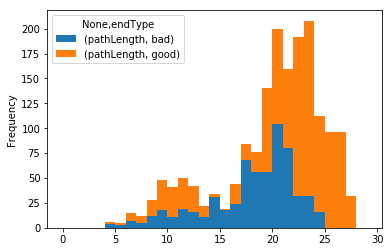

In [8]:
allPaths[['pathLength','endType']].pivot(columns= 'endType').plot(kind='hist', stacked = True, bins = range(30))

Next we can count how many pauses are found in each alternative story path, as expected most stories have a single pause.

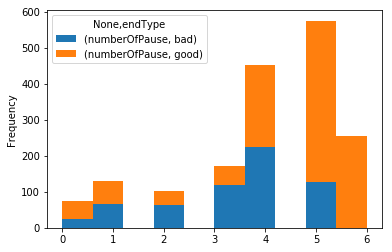

In [9]:
allPaths[['numberOfPause','endType']].pivot(columns= 'endType').plot(kind='hist', stacked = True)

Distribution of number of steps to the first pause by end type.

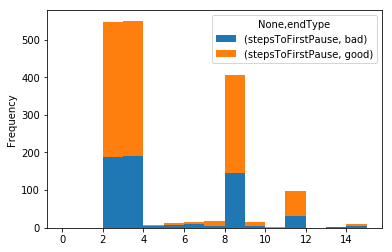

In [10]:
allPaths[['stepsToFirstPause','endType']].pivot(columns= 'endType').plot(kind='hist', stacked = True, bins = range(16))

### Find the number of sub-stories

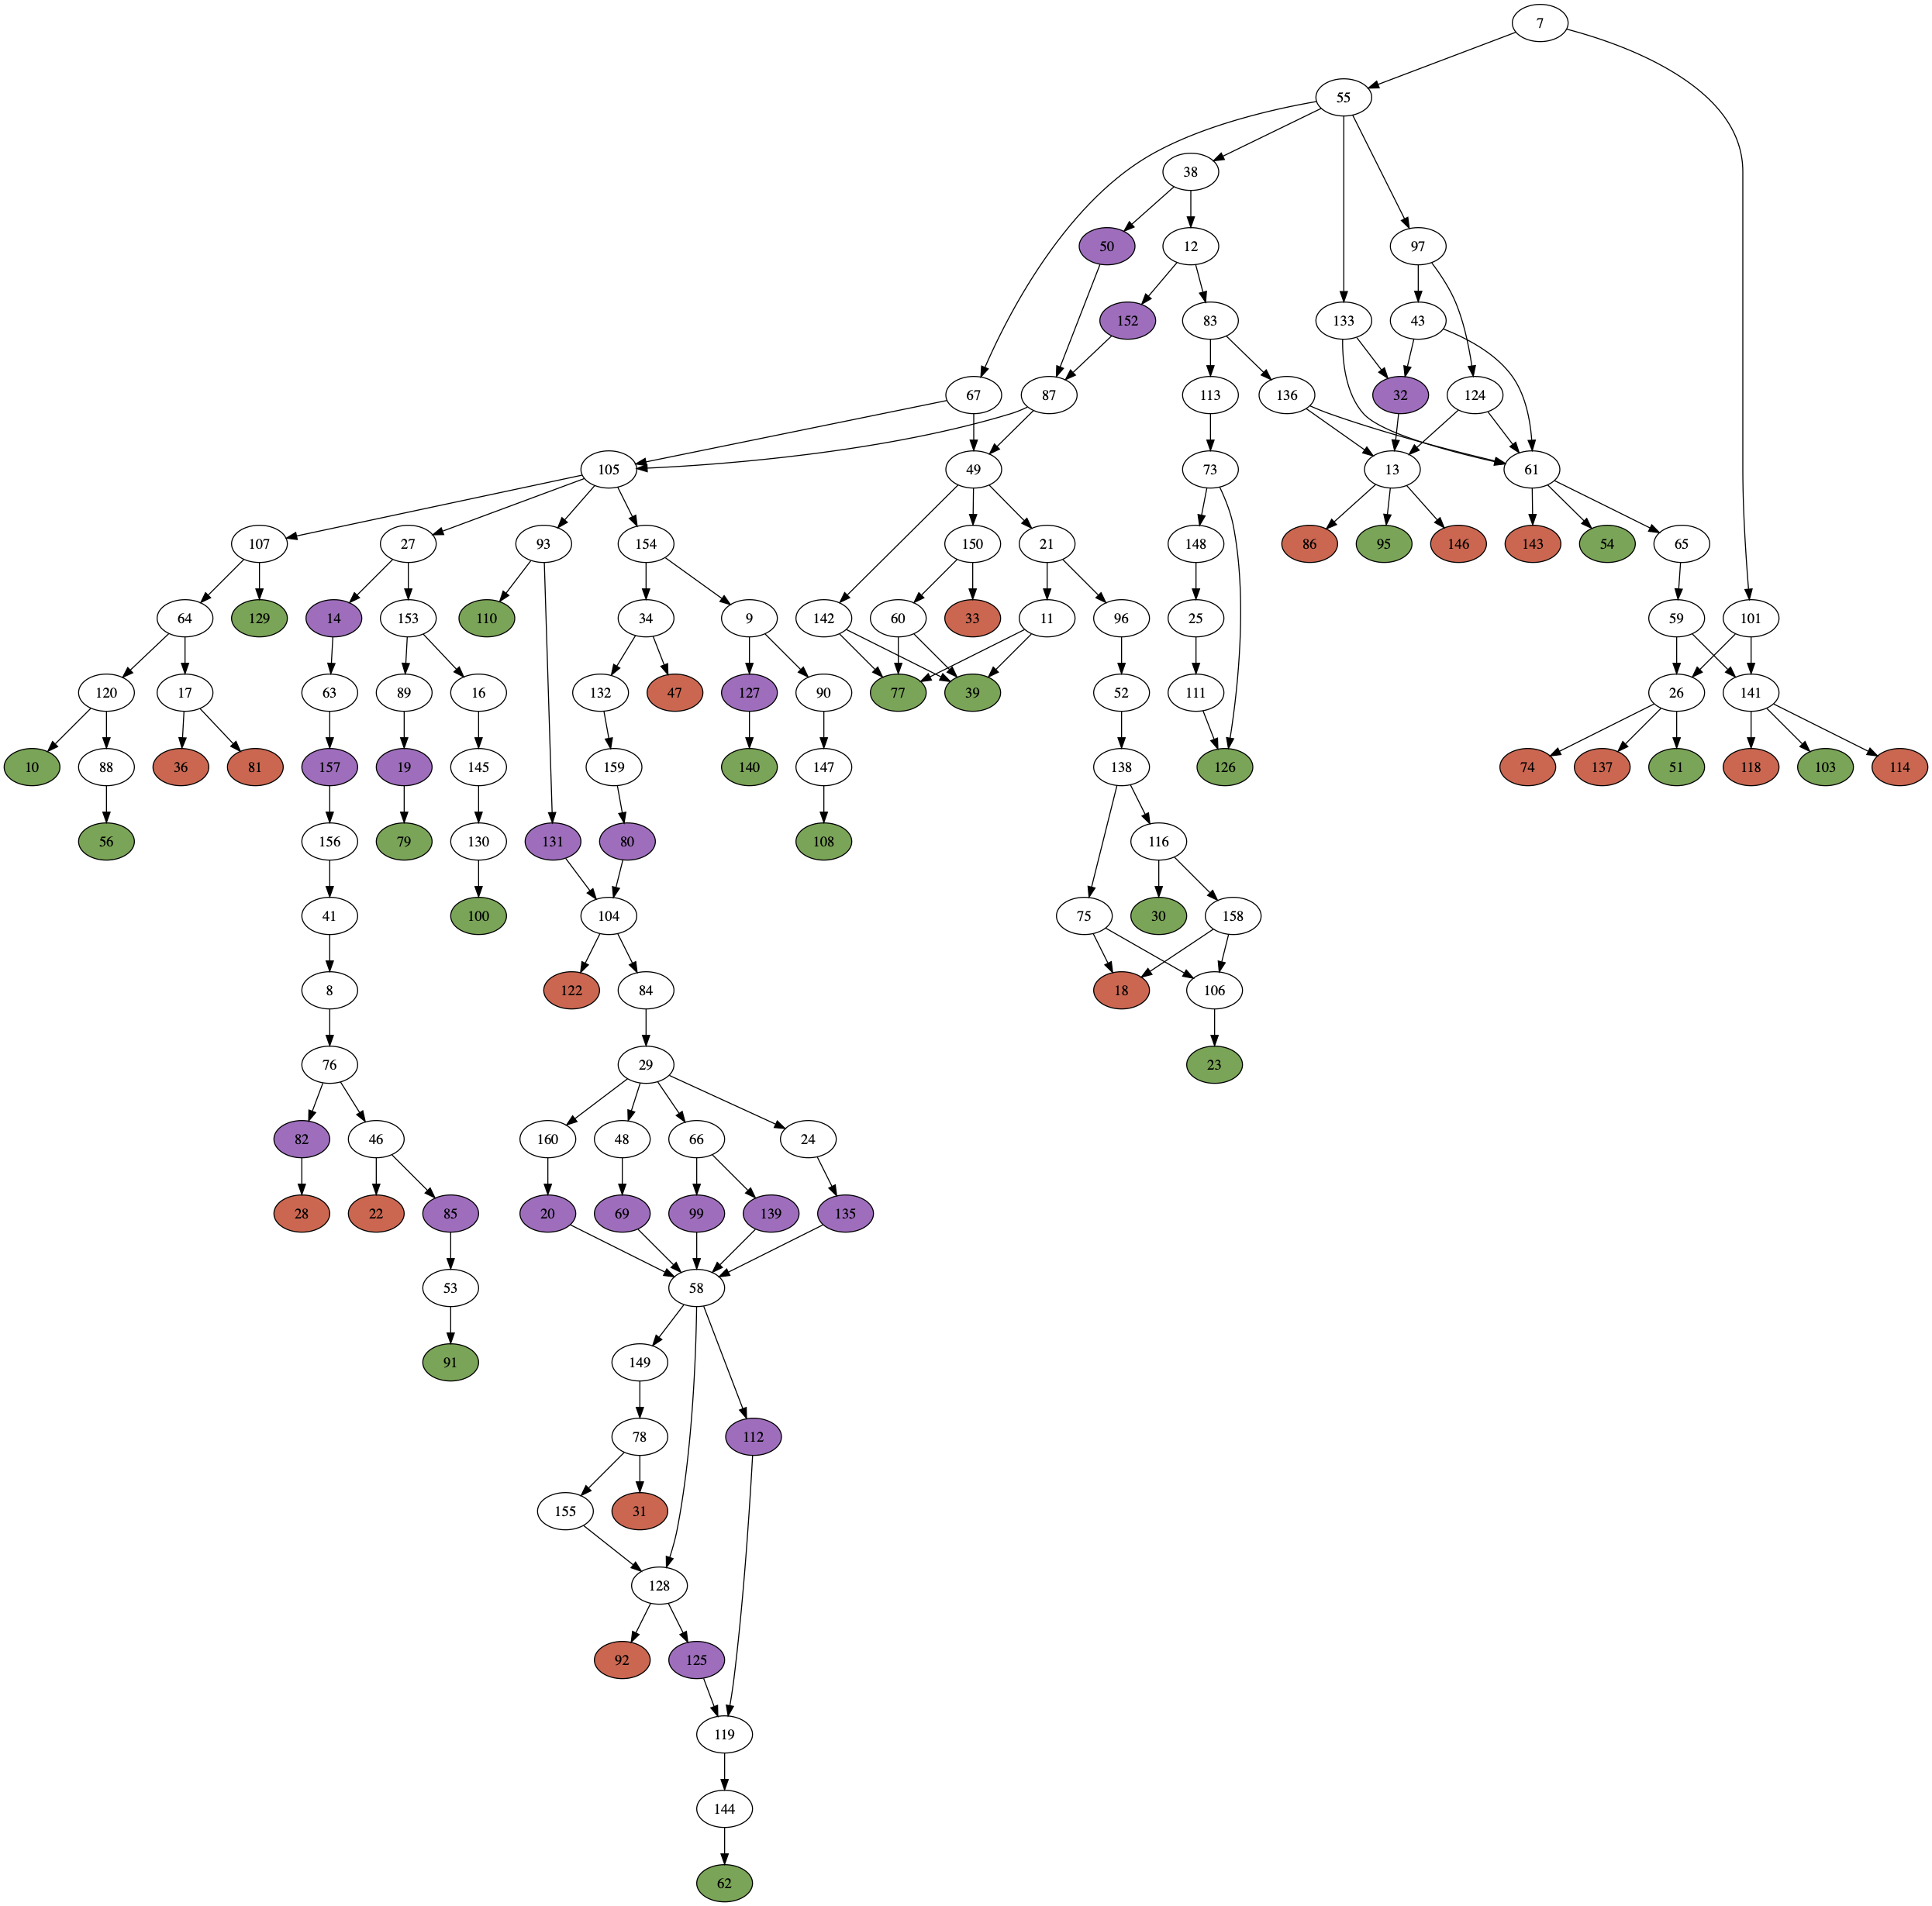

In [11]:
# cluster paths that are more than 10% similar to each other
DolmadakiaStoryStructure.iterativeClusterPaths(0.1)
DolmadakiaStoryStructure.pathsToEdgelist()
DolmadakiaStoryStructure.saveFig(figPath/'dolmadakiaPathsClustered.png', noSingle=True)
i = Image(filename=str(figPath/'dolmadakiaPathsClustered.png'))
display(i)

In [12]:
%%capture
# recalculate paths
DolmadakiaStoryStructure.savePathStats(7, dataPath/'dolmadakia'/'allPaths.dat')

# Try different thresholds for clustering
thresholds = np.arange(10)/10 + 0.1
CutoffEffect = pd.DataFrame(index=range(len(thresholds)),columns=['Threshold','NumberOfPaths'])

for i, threshold in enumerate(thresholds):
    DolmadakiaStoryStructure.iterativeClusterPaths(threshold)
    CutoffEffect.iloc[i]=[threshold,len(DolmadakiaStoryStructure.paths)]

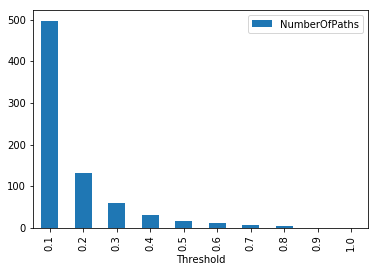

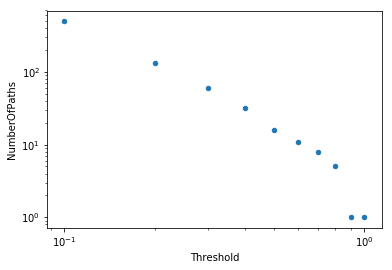

In [13]:
CutoffEffect.to_csv(dataPath/'dolmadakia'/'CutoffEffect.dat')
CutoffEffect.plot(kind='bar',x='Threshold', y = 'NumberOfPaths')
CutoffEffect.plot(kind='scatter',x='Threshold', y = 'NumberOfPaths',loglog=True)

## Orient Express!

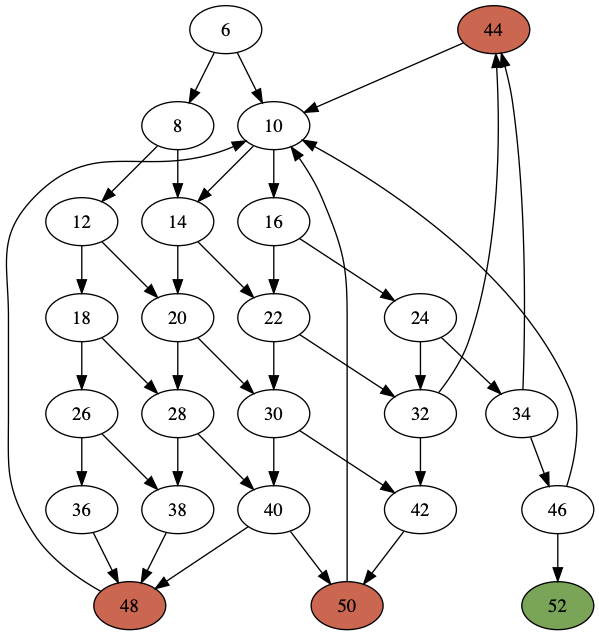

Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped des

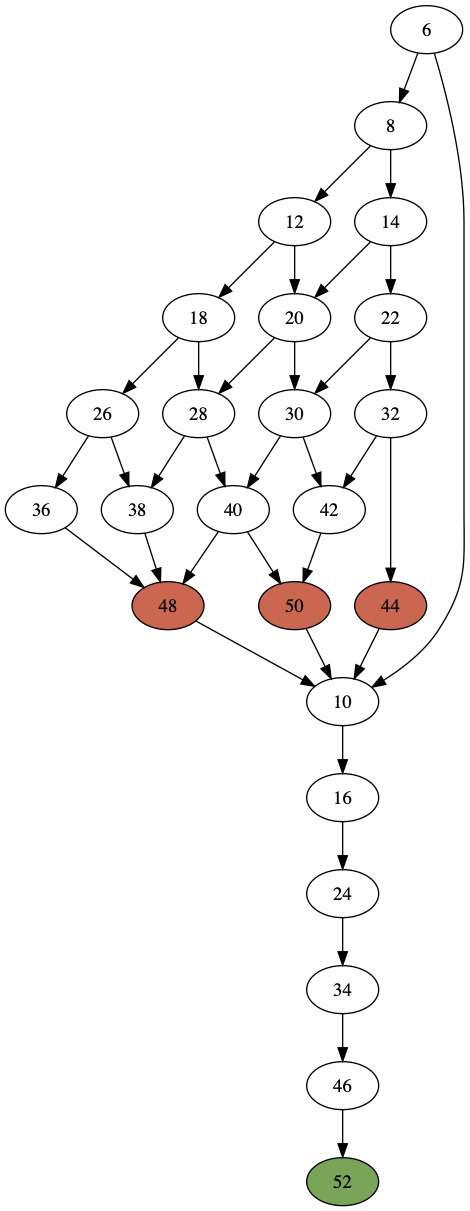

In [14]:
# create a new object
OrientExpressStoryStructure = storystructure()
# load an edgelist and node attributes
OrientExpressStoryStructure.loadStory(edges=dataPath/'orientExpress'/'edgelist.csv',
            nodes=dataPath/'orientExpress'/'nodeAttributes.csv')
# Make figure
OrientExpressStoryStructure.saveFig(figPath/'orientExpress.png')
i = Image(filename=str(figPath/'orientExpress.png'))
display(i)
OrientExpressStoryStructure.simplify()
OrientExpressStoryStructure.makeGraph() 
#%%capture
OrientExpressStoryStructure.savePathStats(6, dataPath/'orientExpress'/'allPaths.dat')

OrientExpressStoryStructure.pathsToEdgelist()
OrientExpressStoryStructure.saveFig(figPath/'orientExpressPaths.png')
i = Image(filename=str(figPath/'orientExpressPaths.png'))
display(i)

In [15]:
[node.id for node in OrientExpressStoryStructure.getStart()]


[6]

In [16]:
allPaths = pd.read_csv(dataPath/'orientExpress'/'allPaths.dat', sep = "\t", na_values='None')
len(allPaths)

23

In [17]:
# Try different thresholds for clustering
thresholds = np.arange(10)/10 + 0.1
CutoffEffect = pd.DataFrame(index=range(len(thresholds)),columns=['Threshold','NumberOfPaths'])

for i, threshold in enumerate(thresholds):
    OrientExpressStoryStructure.iterativeClusterPaths(threshold)
    CutoffEffect.iloc[i]=[threshold,len(OrientExpressStoryStructure.paths)]

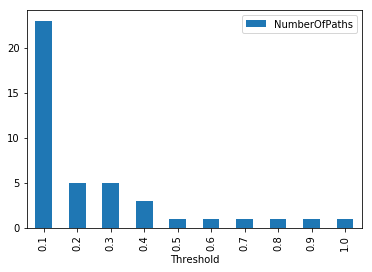

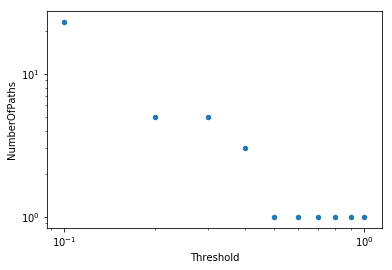

In [18]:
CutoffEffect.to_csv(dataPath/'orientExpress'/'CutoffEffect.dat')
CutoffEffect.plot(kind='bar',x='Threshold', y = 'NumberOfPaths')
CutoffEffect.plot(kind='scatter',x='Threshold', y = 'NumberOfPaths',loglog=True)

In [25]:
# recalculate paths
OrientExpressStoryStructure.savePathStats(6, dataPath/'orientExpress'/'allPaths.dat')


Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 48 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped descending into 10 to avoid cycles
Skipped des

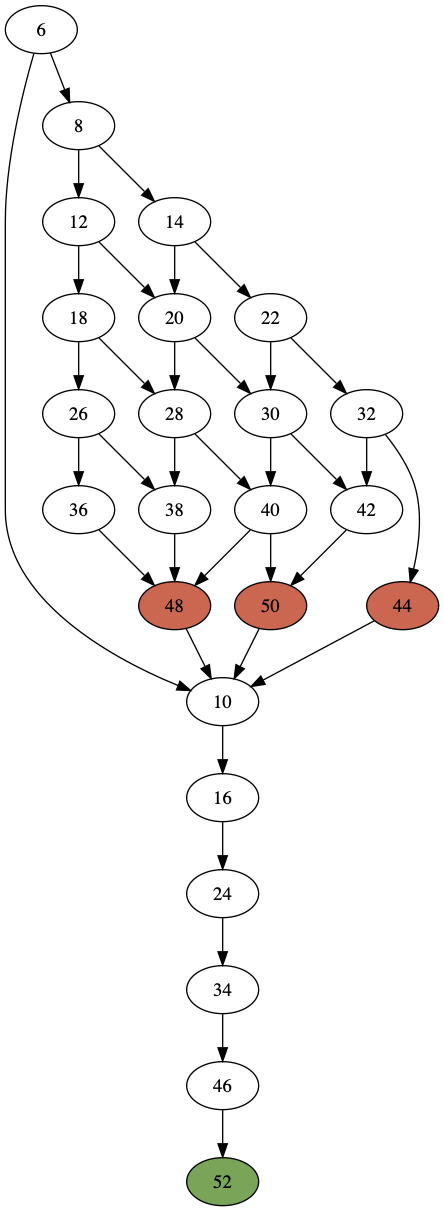

In [26]:
# cluster paths that are more than 10% similar to each other
OrientExpressStoryStructure.iterativeClusterPaths(0.1)
OrientExpressStoryStructure.pathsToEdgelist()
OrientExpressStoryStructure.saveFig(figPath/'orientExpressPathsClustered.png', noSingle=True)
i = Image(filename=str(figPath/'orientExpressPathsClustered.png'))
display(i)